In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras import Model, regularizers

In [160]:
#Connect to your own Google Drive // Used on Google Colab
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/My Drive/DataScienceProjetct/"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/DataScienceProjetct
model0.h5      model3.h5	    modelQuantitaized.h5  modelRandomNewSeed.h5
model1.h5      modelAdvTrained0.h5  modelQuantitized.h5
model2.h5      modelAdvTrained1.h5  modelRandomFrom1.h5
model3_bis.h5  model.png	    modelRandom.h5


In [0]:
mnist = tf.keras.datasets.mnist
cifar = tf.keras.datasets.cifar10

dataset = cifar
batch_size = 128

In [0]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

x_test = x_test[0:int(x_test.shape[0]/2)]
x_valid = x_test[int(x_test.shape[0]/2):]
y_test = y_test[0:int(y_test.shape[0]/2)]
y_valid = y_test[int(y_test.shape[0]/2):]

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(batch_size)

In [0]:
from tensorflow.keras import layers

# Quantization Custom Layer
class Quantization(layers.Layer):

  def __init__(self, level=8):
    super(Quantization, self).__init__()
    self.level = float(level)

  def call(self, inputs):
    return tf.math.floor(tf.multiply(tf.constant(self.level),inputs))

  def get_config(self):
    return {'level': self.level}

# Dequantization Custom Layer
class Dequantization(layers.Layer):

  def __init__(self, level=8):
    super(Dequantization, self).__init__()
    self.level = float(level)

  def call(self, inputs):
    return tf.multiply(tf.constant(1/self.level),inputs)

  def get_config(self):
    return {'level': self.level}


In [0]:
cifar10_labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [0]:
protecting_layer =  models.Sequential(name='protection') 
protecting_layer.add(layers.Activation('tanh', input_shape=(32, 32, 3)))
protecting_layer.add(Quantization())
protecting_layer.add(Dequantization())

protecting_layer.compile()

In [166]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt

# Set seeds
tf.random.set_seed(18)
np.random.seed(18)

# Parameters
regularization = 1e-4

# Define model
refmodel = models.Sequential(name='cifar')

refmodel.add(layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3), padding='same', kernel_regularizer=regularizers.l2(regularization)))
refmodel.add(layers.BatchNormalization())
refmodel.add(layers.MaxPooling2D((2, 2)))
refmodel.add(layers.Dropout(0.1))
refmodel.add(layers.Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(regularization)))
refmodel.add(layers.BatchNormalization())
refmodel.add(layers.MaxPooling2D((2, 2)))
refmodel.add(layers.Dropout(0.2))
refmodel.add(layers.Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(regularization)))
refmodel.add(layers.MaxPooling2D((2, 2)))
refmodel.add(layers.Dropout(0.3))
refmodel.add(layers.BatchNormalization())
refmodel.add(layers.AveragePooling2D())
refmodel.add(layers.Flatten())
refmodel.add(layers.Dense(128, activation='relu'))
refmodel.add(layers.Dense(10))

refmodel.summary()

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Model: "cifar"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0     

Epoch 1/20
391/391 [==============================] - 7s 18ms/step - loss: 1.3484 - accuracy: 0.5181 - val_loss: 2.4609 - val_accuracy: 0.2752
Epoch 2/20
391/391 [==============================] - 7s 17ms/step - loss: 1.0164 - accuracy: 0.6467 - val_loss: 0.9792 - val_accuracy: 0.6684
Epoch 3/20
391/391 [==============================] - 7s 17ms/step - loss: 0.8874 - accuracy: 0.6912 - val_loss: 0.9173 - val_accuracy: 0.6888
Epoch 4/20
391/391 [==============================] - 7s 17ms/step - loss: 0.8090 - accuracy: 0.7212 - val_loss: 0.8038 - val_accuracy: 0.7292
Epoch 5/20
391/391 [==============================] - 7s 17ms/step - loss: 0.7551 - accuracy: 0.7425 - val_loss: 0.7846 - val_accuracy: 0.7410
Epoch 6/20
391/391 [==============================] - 7s 17ms/step - loss: 0.7112 - accuracy: 0.7589 - val_loss: 0.7253 - val_accuracy: 0.7608
Epoch 7/20
391/391 [==============================] - 7s 17ms/step - loss: 0.6794 - accuracy: 0.7690 - val_loss: 0.7983 - val_accuracy: 0.7310

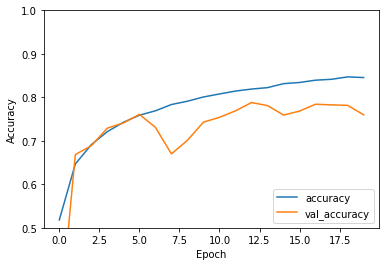

In [167]:
quantization = False

if quantization:
  model = tf.keras.models.Sequential(name = 'protected_model')
  model.add(protecting_layer)
  model.add(refmodel)
  model.compile(optimizer='adam',
                loss=loss,
                metrics=['accuracy'])

  history = model.fit(train_ds, epochs=20,
                      validation_data=test_ds)
  model.save('modelQuantitized.h5')

else:

  # Compile and fit
  model = refmodel
  model.compile(optimizer='adam',
                loss=loss,
                metrics=['accuracy'])

  model.save('model0.h5')

  history = model.fit(train_ds, epochs=20,
                      validation_data=test_ds)
  
  model.save('model1.h5')

# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds, verbose=1)

In [168]:
model.evaluate(valid_ds, verbose=1)

20/20 [==============================] - 0s 6ms/step - loss: 0.7785 - accuracy: 0.7616


[0.7784903645515442, 0.7616000175476074]

In [169]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

@tf.function
def adversarial_training(image, label, model = model, loss_object=loss_fn, EPOCHS = 8, epsilon = 0.05, eta = 0.1):
  adversarial_image = image
  for epoch in range(EPOCHS):
    with tf.GradientTape() as tape:
      tape.watch(adversarial_image)
      prediction = model(adversarial_image, training=False)
      loss = loss_object(label, prediction)
    gradients = tape.gradient(loss, adversarial_image)
    perturbation = tf.clip_by_value(eta*tf.sign(gradients), 0, epsilon)
    adversarial_image = tf.add(image, perturbation)
  return adversarial_image, perturbation

@tf.function
def random_adversarial_training(image, label, epsilon = 0.05):
    adversarial_image = image  
    perturbation = tf.clip_by_value(np.random.normal(0,epsilon), 0, epsilon)
    # Need to apply infinte-norm
    adversarial_image = tf.add(image, perturbation)
    return adversarial_image, perturbation

def generate_adv_xy(ds, model = model, loss_object=loss_fn, EPOCHS = 8, epsilon = 0.05, eta = 0.1, attack='pgd'):
  if attack == 'pgd':
    adv_x = [adversarial_training(images, labels, model, loss_fn, EPOCHS, epsilon, eta)[0] for images, labels in iter(ds)]
  elif attack =='random':
    adv_x = [random_adversarial_training(images, labels, epsilon)[0] for images, labels in iter(ds)]
  adv_x = tf.concat(adv_x,axis=0).numpy()
  adv_y = tf.concat([labels for images, labels in iter(ds)],axis=0).numpy()
  return adv_x, adv_y

def generate_adv_ds(ds, model = model, loss_object=loss_fn, EPOCHS = 8, epsilon = 0.05, eta = 0.1, attack='pgd'):
  adv_x, adv_y = generate_adv_xy(ds, model, loss_fn, EPOCHS, epsilon, eta, attack)
  adv_ds = tf.data.Dataset.from_tensor_slices(
      (adv_x, adv_y)).batch(batch_size)

  return adv_ds

adv_valid_ds = generate_adv_ds(valid_ds)
model.evaluate(adv_valid_ds, verbose=1)

20/20 [==============================] - 0s 6ms/step - loss: 6.7562 - accuracy: 0.0568


[6.756230354309082, 0.0568000003695488]

In [170]:
if quantization:
  adv_valid_ds = generate_adv_ds(valid_ds, model=refmodel)
else:
  adv_valid_ds = generate_adv_ds(valid_ds, model=model)
refmodel.evaluate(adv_valid_ds, verbose=1)
model.evaluate(adv_valid_ds, verbose=1)

20/20 [==============================] - 0s 6ms/step - loss: 6.7562 - accuracy: 0.0568


[6.756230354309082, 0.0568000003695488]

# **Adversarial Training**

In [171]:
model = tf.keras.models.load_model('model0.h5')

epochs = 20
dataset = train_ds
proportion_adv_images = 0.5

for epoch in range(epochs):
  count = 0
  
  dataset = train_ds.shuffle(128)
  for images, labels in iter(dataset):
    index_adv = int(proportion_adv_images*images.shape[0])
    adv_x = adversarial_training(images[0:index_adv], labels[0:index_adv], model = model, loss_object=loss_fn, EPOCHS = 8, epsilon = 0.05, eta = 0.1)[0]
    adv_y = labels[0:index_adv]
    training_batch_images = tf.concat([adv_x,images[index_adv:images.shape[0]]],axis=0)
    training_batch_labels = tf.concat([adv_y,labels[index_adv:labels.shape[0]]], axis=0)
    result = model.train_on_batch(training_batch_images, training_batch_labels)

    if count % 100 == 0:
      test_imgs, test_labels = next(iter(test_ds))
      test_result = model.test_on_batch(test_imgs, test_labels)
    count += 1
  print(f'Epoch {epoch+1}/{epochs}')
  print(f'{count}/{391} [==============================] - -  loss: {int(result[0]*100)/100} - accuracy: {int(result[1]*100)/100} - val_loss: {int(test_result[0]*100)/100} - val_accuracy: {int(test_result[1]*100)/100}')

Epoch 1/20
391/391 [==============================] - -  loss: 1.59 - accuracy: 0.46 - val_loss: 2.26 - val_accuracy: 0.25
Epoch 2/20
391/391 [==============================] - -  loss: 1.52 - accuracy: 0.42 - val_loss: 1.1 - val_accuracy: 0.64
Epoch 3/20
391/391 [==============================] - -  loss: 1.64 - accuracy: 0.43 - val_loss: 0.99 - val_accuracy: 0.7
Epoch 4/20
391/391 [==============================] - -  loss: 1.41 - accuracy: 0.47 - val_loss: 0.97 - val_accuracy: 0.67
Epoch 5/20
391/391 [==============================] - -  loss: 1.41 - accuracy: 0.45 - val_loss: 0.95 - val_accuracy: 0.73
Epoch 6/20
391/391 [==============================] - -  loss: 1.43 - accuracy: 0.46 - val_loss: 1.0 - val_accuracy: 0.66
Epoch 7/20
391/391 [==============================] - -  loss: 1.27 - accuracy: 0.55 - val_loss: 0.92 - val_accuracy: 0.72
Epoch 8/20
391/391 [==============================] - -  loss: 1.19 - accuracy: 0.53 - val_loss: 0.87 - val_accuracy: 0.75
Epoch 9/20
391/391 

In [0]:
#model.save('modelAdvTrained0.h5')

In [173]:
model.evaluate(valid_ds, verbose=1)

20/20 [==============================] - 0s 6ms/step - loss: 0.8092 - accuracy: 0.7352


[0.8091651201248169, 0.7351999878883362]

In [174]:
adv_valid_ds = generate_adv_ds(valid_ds, model=model)
model.evaluate(adv_valid_ds, verbose=1)

20/20 [==============================] - 0s 6ms/step - loss: 1.5628 - accuracy: 0.4212


[1.5627611875534058, 0.4212000072002411]

# **Quantization & Adversarial Training**

In [175]:
refmodel = tf.keras.models.load_model('model0.h5')

protected_model = tf.keras.models.Sequential(name = 'protected_model')
protected_model.add(protecting_layer)
protected_model.add(refmodel)
protected_model.compile(optimizer='adam',
              loss=loss,
              metrics=['accuracy'])

epochs = 20
dataset = train_ds
proportion_adv_images = 0.5

for epoch in range(epochs):
  count = 0
  
  dataset = train_ds.shuffle(128)
  for images, labels in iter(dataset):
    index_adv = int(proportion_adv_images*images.shape[0])
    adv_x = adversarial_training(images[0:index_adv], labels[0:index_adv], model = refmodel, loss_object=loss_fn, EPOCHS = 8, epsilon = 0.05, eta = 0.1)[0]
    adv_y = labels[0:index_adv]
    training_batch_images = tf.concat([adv_x,images[index_adv:images.shape[0]]],axis=0)
    training_batch_labels = tf.concat([adv_y,labels[index_adv:labels.shape[0]]], axis=0)
    result = protected_model.train_on_batch(training_batch_images, training_batch_labels)

    if count % 100 == 0:
      test_imgs, test_labels = next(iter(test_ds))
      test_result = protected_model.test_on_batch(test_imgs, test_labels)
    count += 1
  print(f'Epoch {epoch+1}/{epochs}')
  print(f'{count}/{391} [==============================] - -  loss: {int(result[0]*100)/100} - accuracy: {int(result[1]*100)/100} - val_loss: {int(test_result[0]*100)/100} - val_accuracy: {int(test_result[1]*100)/100}')

test_loss, test_acc = protected_model.evaluate(test_ds, verbose=1)

Epoch 1/20
391/391 [==============================] - -  loss: 1.58 - accuracy: 0.47 - val_loss: 0.77 - val_accuracy: 0.74
Epoch 2/20
391/391 [==============================] - -  loss: 1.36 - accuracy: 0.5 - val_loss: 0.77 - val_accuracy: 0.74
Epoch 3/20
391/391 [==============================] - -  loss: 1.29 - accuracy: 0.51 - val_loss: 0.77 - val_accuracy: 0.74
Epoch 4/20
391/391 [==============================] - -  loss: 1.29 - accuracy: 0.53 - val_loss: 0.77 - val_accuracy: 0.74
Epoch 5/20
391/391 [==============================] - -  loss: 1.21 - accuracy: 0.5 - val_loss: 0.77 - val_accuracy: 0.74
Epoch 6/20
391/391 [==============================] - -  loss: 1.49 - accuracy: 0.44 - val_loss: 0.77 - val_accuracy: 0.74
Epoch 7/20
391/391 [==============================] - -  loss: 1.22 - accuracy: 0.57 - val_loss: 0.77 - val_accuracy: 0.74
Epoch 8/20
391/391 [==============================] - -  loss: 1.18 - accuracy: 0.54 - val_loss: 0.77 - val_accuracy: 0.74
Epoch 9/20
391/391

In [176]:
protected_model.evaluate(valid_ds, verbose=1)
adv_valid_ds = generate_adv_ds(valid_ds, model=refmodel)
refmodel.evaluate(adv_valid_ds, verbose=1)
protected_model.evaluate(adv_valid_ds, verbose=1)

20/20 [==============================] - 0s 6ms/step - loss: 1.4811 - accuracy: 0.4852


[1.481109619140625, 0.4851999878883362]

# **Result Visualization**

In [177]:
import pandas as pd

data = {'Reference Model': [0.7803999781608582, 0.0576],
        'Quantitized':[0.7796000242233276, 0.26080000400543213],
        'AdvTrain': [0.7608000040054321, 0.43639999628067017],
        'Quantitized & AdvTrain':[0.7320, 0.5448],
        }

df = pd.DataFrame(data=data, index=['Clean_Accuracy', 'Adv_Accuracy'])

import plotly.graph_objects as go


fig = go.Figure()
fig.add_trace(go.Bar(y=df.iloc[0].values, x=df.columns, name="Clean_Accuracy"))
fig.add_trace(go.Bar(y=df.iloc[1].values, x=df.columns, name="Adv_Accuracy"))

fig.show()

Initital prediction was deer, adversarial prediction is frog
 
Initial Image
-------------


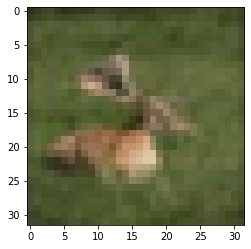

 
Perturbation
------------


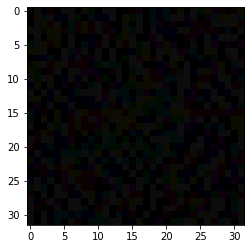

 
Adversarial Image
-----------------


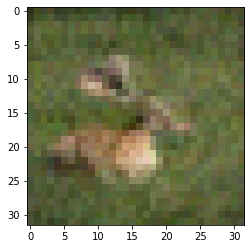

In [179]:
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('model1.h5')
select = 1

images, labels = next(iter(valid_ds))
image = images[select:select+1]
label = labels[select:select+1]

adversarial_image, perturbation = adversarial_training(image, label, model = model)
initial_pred = cifar10_labels[model(image, training=False).numpy().argmax()]
adversarial_pred = cifar10_labels[model(adversarial_image, training=False).numpy().argmax()]

print(f'Initital prediction was {initial_pred}, adversarial prediction is {adversarial_pred}')
print(' ')
print('Initial Image')
print('-------------')
plt.imshow(tf.squeeze(image))
plt.show()

print(' ')
print('Perturbation')
print('------------')
plt.imshow(tf.squeeze(perturbation))
plt.show()

print(' ')
print('Adversarial Image')
print('-----------------')
plt.imshow(tf.squeeze(adversarial_image))
plt.show()

In [0]:
# TO DO LIST
# Invert name Test - Validation set
# Validation set for adversarial training should be 50/50 adversarial training